## 24W-COM SCI-M148 Project 2 - Binary Classification Comparative Methods

Name: Jake Kovinsky

UID: 105505933

### **Submission Guidelines**
1. Please fill in your name and UID above.

2. Please submit a **PDF printout** of your Jupyter Notebook to **Gradescope**. If you have any trouble accessing Gradescope, please let a TA know ASAP.  

3. As the PDF can get long, please tag the respective sections to ensure the readers know where to look.  

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results.

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance.

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed.

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions

In [1]:
#Here are a set of libraries we imported to complete this assignment.
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random

random.seed(42)

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [2]:
data = pd.read_csv('heartdisease.csv')

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [6]:
from sklearn.preprocessing import LabelEncoder # use label encoder 
le = LabelEncoder()
data["sick"] = le.fit_transform(data["sick"]) # fit label encoder and return encoded labels

### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient?

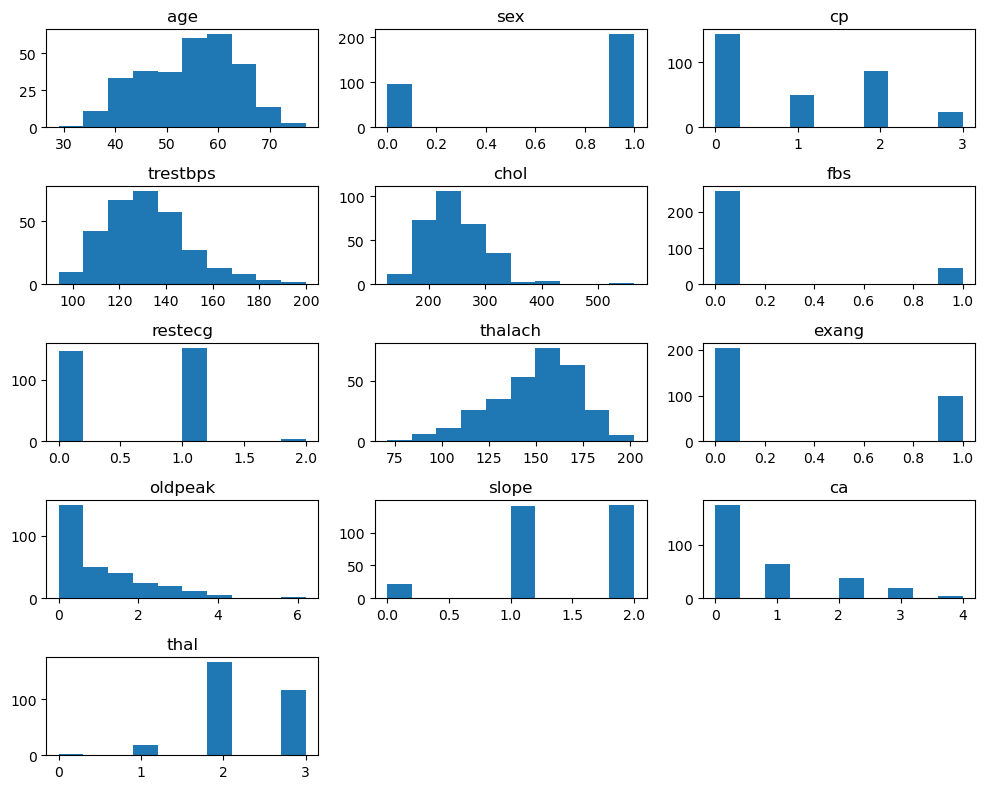

In [7]:
cols = data.columns[:-1]
fig = plt.figure(figsize=(10, 8), tight_layout=True)
for i in range(len(cols)):
    plt.subplot(5, 3, i+1)
    plt.hist(data[cols[i]])
    plt.title(f"{cols[i]}")
plt.show()

- Binary: `sex`, `exang`, and `fbs`
- Limited Selection: `cp` (0-3), `restecg` (0-2), `slope` (0-2), `ca` (0-4), and `thal` (0-3)
- Gradient Distribution: `age`,  `trestbps`, `chol`, `thalach`, and `oldpeak`

### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results:

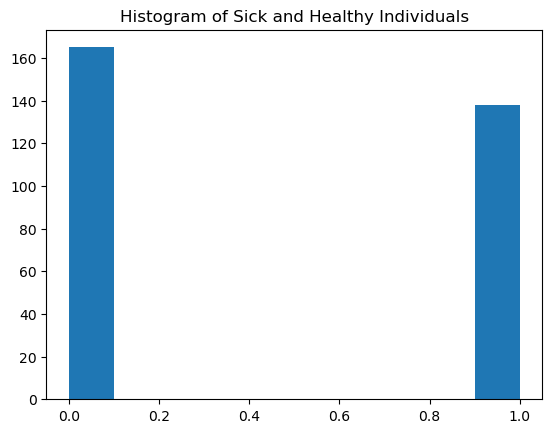

In [8]:
plt.hist(data['sick'])
plt.title("Histogram of Sick and Healthy Individuals")
plt.show()

In [9]:
print("Number of sick individuals: ", f"{sum(data['sick']==1)}", "("f"{round((sum(data['sick']==1)/len(data['sick']))*100)}""%)")
print("Number of healthy individuals: ", f"{sum(data['sick']==0)}", "("f"{round((sum(data['sick']==0)/len(data['sick']))*100)}""%)")

Number of sick individuals:  138 (46%)
Number of healthy individuals:  165 (54%)


We appear to have an approximate even number of sick and healthy individuals.

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

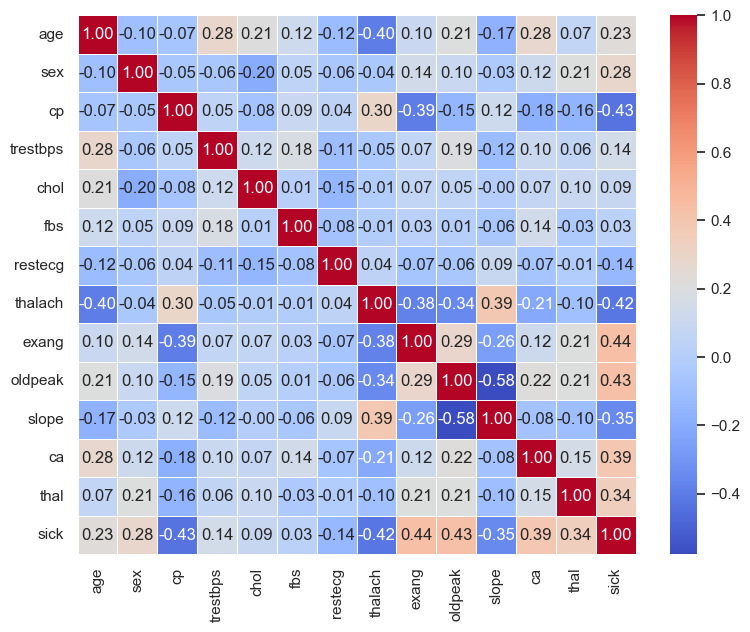

In [10]:
sns.set(rc={"figure.figsize":(9, 7)})
sns.heatmap(data.corr(), cmap="coolwarm", annot = True, fmt=".2f", linewidths=0.5)
plt.show()

<ins><b>Relationships Between Variables:<b></ins>
- `age`: Age appears to be correlated with many different predictors. In medical applications, age has a significant positive relationship with blood pressure, the number of major blood vessels examined, cholestoral, and ST depression induced by exercise. Additionally, age has a significant negative relationship with maxHR. Intuitively, as we age, health deteriorates. 
- `sex`: Health factors also appear to be differentiated by sex. We observe a significant positive relationship with maxHR such that men have a [higher maxHR](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4831892/) than women, on average. I note a significant negative relationship between sex and cholestoral, indicating that the sample of males had lower cholesterol levels than females, on average. There is a relatively weak positive relation between age and sex, [hinting](https://www.ahajournals.org/doi/full/10.1161/01.CIR.99.9.1165) at the possibility that HD is more likely for middle-age men. 
- `thalach` or `maxHR`: maxHR apprears to be associated with many predictors directly related to the heart. Most notably, I observe a positive relation between maxHR and the slope of the ST depression segment and the ordinality of chest pain type. There is a greater proportion of negative relations between maxHR and exercise induced chest pain and ST segment depression, and the number of major blood vessels examined.  
- `cp` or (Chest Pain Type): The type (ordinality) of chest pain also appears to be correlated with predictors that relate directly to the heart. This includes positive relations with maxHR and more significant negative relations with excercise induced angina, the number of major bloos vessells examined, the severity of the blood disorder thalasemnia, and ST depression. 
- `oldpeak` and `slope`: Intuitively, the high negative positive relation between ST segment depression and the ordinality of its slope makes sense. On average, an increase in ST depression level relative to exercise will be ranked more downsloping.

<ins><b>Relationships of Variables to Target Value:<b></ins>

<ins>Positive Correlations</ins>: I observe a significant positive relationship between an individual having heart disease and the variables: exercise induced agina, ST depression, the number of major blood vessels, the blood disorder thalasemmia, sex, and age (in order of descending magnitude).
* `exang` and `oldpeak`: Intuitively, a common symptom of heart disease is chest pain or "agina", which can be exacerbated by physical activity. If rates of angina induced by exercise are associated with heart disease, it also makes sense why ST depression (commonly [associated](https://www.medicalnewstoday.com/articles/st-depression-on-ecg#causes) with heart defects) induced by exercise is also positively correlated with an individual having heart disease. 
* `ca`: It is possible that the number of major vessels (0-3) colored by flourosopy is correlated with heart disease because more vessels may need to be examined to locate any blockages if an individual is at risk of heart problems. 
* `thal`: The severity of thalasemnia is a blood disorder that results in abnormal hemoglobin levels. The correlation we observe might be due to the severity of anemia (low blood cell count), which can be very [impactful](https://www.acc.org/latest-in-cardiology/articles/2021/07/06/12/18/anemia-and-heart-failure) on the progression of heart failure.
* `sex`: The positive relationship between sex and having heart disease might represent sex differences related to this health problem. According to the CDC, heart disease is the cause for 1 in every 4 male deaths and 1 in every 5 female deaths. 
* `age`: In general, older people are [much more](https://www.nia.nih.gov/health/heart-health/heart-health-and-aging) likely than younger people to suffer a heart attack, to have a stroke, or to develop heart disease and heart failure.

<ins>Negative Correlations</ins>: I observe a significant negative relationship between an individual having heart disease and the variables: chest pain type, maximum heart rate, and slope of ST depression (in order of descending magnitude).
* `cp`: Not exhibiting chest pain and remaining asymptomatic might impact the quality of care and prevention that an individual seeks before being admitted to the ER. According to the [Celevend Clinic](https://my.clevelandclinic.org/health/diseases/21630-silent-heart-attack), missing signs or symptoms can make it difficult for healthcare providers to prevent further heart damage. This might also relate to aytpical chest pain, which is ambiguous to treat.
* `thalac`: As people age, average maxHR [falls](https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you). As age is highly correlated with risk of heart disease, low maxHR may signify an increased risk of heart disease.
* `slope`: Intuitively, the slope of someone with an abnormally below average ST depression will have an ST segment that has negative slope. 

<ins>Insignificant Correlations</ins>: 
* `trestbps`, `chol`, `fbs`: All three attributes might increase the risk of heart disease, but their relatively low positive relationship with the target variable might signify an association with symptoms that bring patients into the ER, indepedent of having heart disease.



## Part 2. Prepare the 'Raw' Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe.

In [11]:
sick_labels = data['sick'].copy()
data = data.drop(labels="sick", axis=1) # drop sick datafield from dataframe

### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split() method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, sick_labels, test_size=0.30, random_state=42)

In [13]:
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (212, 13)
y train: (212,)
X test: (91, 13)
y test: (91,)


### We'll explore how not processing your data can impact model performance by using the K-Nearest Neighbor classifier. One thing to note was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our raw data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [14]:
# k-Nearest Neighbors algorithm
KNN_raw = KNeighborsClassifier()
KNN_raw.fit(X_train, y_train)
print("Accuracy: %.3f" % metrics.accuracy_score(y_test, KNN_raw.predict(X_test)))

Accuracy: 0.659


### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler. Use the fit_transform() to fit this pipeline to your training data. and then transform() to apply that pipeline to your test data

Hint:
1. Create separate pipelines for numeric and categorical features with Pipeline() and then combining them with ColumnTransformer()
2. First, fit the full pipeline with the training data. Then, apply it to the test data as well.

### Pipeline:

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [17]:
# seperate pipelines into numberic and categorical features

NUMERIC_FEATURES = ["age", "trestbps", "chol", "thalach", "oldpeak"]
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

CATEGORICAL_FEATURES = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder())])

# combine features using ColumnTransformer()
column_transformer = ColumnTransformer(
    transformers=[
        ("categories", categorical_transformer, CATEGORICAL_FEATURES),
        ("numerics", numeric_transformer, NUMERIC_FEATURES),
    ]
)

X_train_transformed = column_transformer.fit_transform(X_train)

In [18]:
# Pipeline my test data
X_test_transformed = column_transformer.transform(X_test)

### Now retrain your model and compare the accuracy metrics (Accuracy, Precision, Recall, F1 Score) with the raw and pipelined data.

In [19]:
# k-Nearest Neighbors algorithm
class my_model:
    def __init__(self, model, y_true, X):
        self.model_ = model
        self.y_true_ = y_true
        self.X_ = X
        self.metrics_ = {}
    
    def classification_report(self):
        self.metrics_["Accuracy"] = metrics.accuracy_score(self.y_true_, self.model_.predict(self.X_))
        self.metrics_["Precision"] = metrics.precision_score(self.y_true_, self.model_.predict(self.X_))
        self.metrics_["Recall"] = metrics.recall_score(self.y_true_, self.model_.predict(self.X_))
        self.metrics_["F1 Score"] = metrics.f1_score(self.y_true_, self.model_.predict(self.X_))
    
    def get_report(self):
        self.classification_report()
        return self.metrics_
    
    def print_report(self):
        for metric, score in self.get_report().items():
            print(f"{metric}: " "%.3f" % score)

print("KNN with raw data")
print("-------------------")
my_model(KNN_raw, y_test, X_test).print_report()


KNN_pipe = KNeighborsClassifier().fit(X_train_transformed, y_train)


print("KNN with pipelined data")
print("-------------------------")
my_model(KNN_pipe, y_test, X_test_transformed).print_report()

KNN with raw data
-------------------
Accuracy: 0.659
Precision: 0.632
Recall: 0.585
F1 Score: 0.608
KNN with pipelined data
-------------------------
Accuracy: 0.857
Precision: 0.833
Recall: 0.854
F1 Score: 0.843


When pipelining the data, KNN performs better overall on all accuracy metrics.

### Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [20]:
n_vals = [1, 2, 3, 5, 7, 9, 10, 20, 50]

reports = []
for idx, n_neighbors in enumerate(n_vals):
    test_model = my_model(KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train_transformed, y_train),
                           y_test, X_test_transformed)
    report = test_model.get_report()
    if idx == 0: print("-----------------------")
    print(f"KNN Algorithm with {n_neighbors} neighbors")
    test_model.print_report()
    print("-----------------------")

-----------------------
KNN Algorithm with 1 neighbors
Accuracy: 0.769
Precision: 0.738
Recall: 0.756
F1 Score: 0.747
-----------------------
KNN Algorithm with 2 neighbors
Accuracy: 0.802
Precision: 0.871
Recall: 0.659
F1 Score: 0.750
-----------------------
KNN Algorithm with 3 neighbors
Accuracy: 0.835
Precision: 0.783
Recall: 0.878
F1 Score: 0.828
-----------------------
KNN Algorithm with 5 neighbors
Accuracy: 0.857
Precision: 0.833
Recall: 0.854
F1 Score: 0.843
-----------------------
KNN Algorithm with 7 neighbors
Accuracy: 0.890
Precision: 0.897
Recall: 0.854
F1 Score: 0.875
-----------------------
KNN Algorithm with 9 neighbors
Accuracy: 0.846
Precision: 0.846
Recall: 0.805
F1 Score: 0.825
-----------------------
KNN Algorithm with 10 neighbors
Accuracy: 0.846
Precision: 0.865
Recall: 0.780
F1 Score: 0.821
-----------------------
KNN Algorithm with 20 neighbors
Accuracy: 0.879
Precision: 0.895
Recall: 0.829
F1 Score: 0.861
-----------------------
KNN Algorithm with 50 neighbor

## Part 3. Additional Learning Methods

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods

### Logistic Regression

Let's now try another classifier,one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model.

### Report metrics for:
1.   Accuracy
2.   Precision
3.   Recall
4.   F1 Score



In [21]:
# Logistic Regression
logitm_default = LogisticRegression().fit(X_train_transformed, y_train)
my_model(logitm_default, y_test, X_test_transformed).print_report()

Accuracy: 0.857
Precision: 0.868
Recall: 0.805
F1 Score: 0.835


### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

- `Accuracy`: Accuracy score reports the fraction of correct predictions from our classifier over n samples. In this case, our classifier achieves 0.85 accuracy, which means that 85% of our predicted lables for our sample (having heart disease or not having heart disease) strictly mataches with the true set of labels. This metric is the most intuitive to interpret, but would fail to demonstrate whether our model is better at predicting the positive class vs the negative class. For example, there might be a case where there are relatively fewer negative class examples compared to the positive class. This would result in a bias accuracy measurement. 
- `Precision`: Intuitvely, precision is the ability of our classifier not to label someone having heart disease (positive class) when the individual does not (negative class). Again, our classifier has high precision. In our example, we should be 87% confident that an individual predicted to have heart disease actually has heart disease. Alternatively, we could say that it is 13% likely that someone without heart disease gets classified as having heart disease (1 - precision).
- `Recall`: Recall is equivalent to the true positive rate (TPR). In the heart disease example, recall tells how likely it is that an individual with heart disease will be missed by the system and end up going undiagnosed: 20% (1 - recall).

Weighing `precision` and `recall` is useful as it allows us to think about tuning the model toward one kind of error or the other. Is it better for someone without heart disease to be diagnosed with heart disease (1 - precision), or for someone with heart disease to go undiagnosed (1- recall)? In medical applications, it is better to leverage the significance of recall at the cost of lower precision because it is worse to undiagnose a health problem than it is to accurately capture that someone does not have the disease. We can actually collapse precision and recall into a single perfoamce measure using the `F1 score`. This measurement is merely the "harmonic mean", which can highlight shortcominings in our model. In this case, the F1 score indicates overall good performance but captures some of model's failure at capturing heart disease in patients.


### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Let's see how your results change!

In [22]:
# Logistic Regression
logitm_sag = LogisticRegression(solver='sag', max_iter=10, penalty='none').fit(X_train_transformed, y_train)
my_model(logitm_sag, y_test, X_test_transformed).print_report()

Accuracy: 0.846
Precision: 0.846
Recall: 0.805
F1 Score: 0.825


/Users/jakekovinsky/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/jakekovinsky/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [23]:
# Logistic Regression
logitm_10000 = LogisticRegression(solver='sag', max_iter=10000, penalty='none').fit(X_train_transformed, y_train)
my_model(logitm_10000, y_test, X_test_transformed).print_report()

Accuracy: 0.835
Precision: 0.825
Recall: 0.805
F1 Score: 0.815


/Users/jakekovinsky/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


### Explain what you changed, and why do you think that may have altered the outcome.

I increased `max_iter` to 10000 itertions. Based off intuition, it took much more than 10 iterations for the solver to converge.

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

In [24]:
logitm_l1 = LogisticRegression(solver='liblinear', max_iter=10000, penalty='l1').fit(X_train_transformed, y_train)
my_model(logitm_l1, y_test, X_test_transformed).print_report()

Accuracy: 0.857
Precision: 0.868
Recall: 0.805
F1 Score: 0.835


### Explain what what the two solver approaches are, and why liblinear may have produced an improved outcome (but not always, and it's ok if your results show otherwise!).

The solver in both situations is our optimization algorithm of choice for computing gradient descent. The `sag` solver uses Stochastic Average Gradient descent, which is faster to converge for large datasets and only supports L2 regularization. On the other hand, `liblinear` uses a coordinate decsent (CD) algorithm, which is a good choice for smaller datasets. With good assumption, the number of samples and number of features in the UCI Heart Disease dataset is relatively small. This may be partially why `liblinear` performs better. In medical applications predictors can be highly correlated, but the use of L1 regularization sets some of our feature weights to zero. Generally speaking, this regularization strategy would reduce the classifier's variance and the likelihood of overfitting. 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [25]:
# SVM
svm_default = SVC(probability=True).fit(X_train_transformed, y_train)

### Report the accuracy, precision, recall, F1 Score, of your model, but in addition, plot a Confusion Matrix of your model's performance

recommend using `from sklearn.metrics import ConfusionMatrixDisplay` for this one!


In [26]:
my_model(svm_default, y_test, X_test_transformed).print_report()

Accuracy: 0.879
Precision: 0.857
Recall: 0.878
F1 Score: 0.867


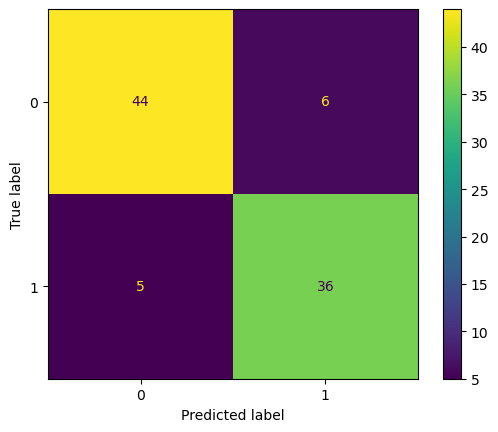

In [27]:
sns.reset_defaults()
from sklearn.metrics import ConfusionMatrixDisplay
predictions = svm_default.predict(X_test_transformed)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

recommend using the `metrics.roc_curve` `metrics.auc` and `metrics.RocCurveDisplay` for this one!

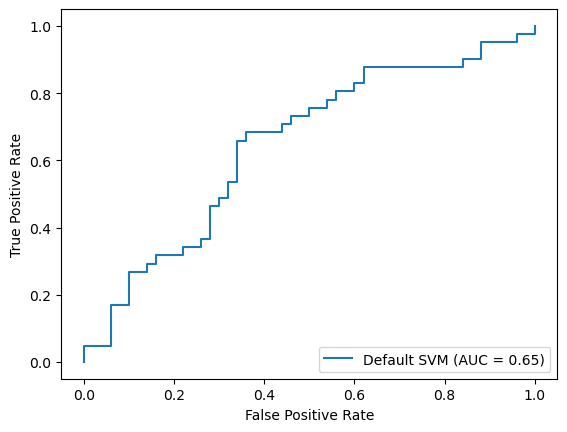

In [28]:
scores = [max(svm_default.predict_proba(X_test_transformed)[i]) for i in range(len(svm_default.predict_proba(X_test_transformed)))]
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Default SVM')
display.plot()
plt.show()

The ROC curve is a widely used performance measure for classification. To calculate the ROC curve, we plot the true positive rate (TPR) against the false positive rate (FPR) at various thresholds. In other words, for every possible value of the threshold, in the range [0, 1], there are corresponding TPR and TNR values. As the threshold increases, the TPR decreases and TNR increases, and as the threshold decreases, the opposite occurs. In general, the area under the ROC curve is a visual indiciation of the predicitive strength of the model. Here we see a relatively small area under the curve signifying a weak performing model.

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [29]:
# SVM
svm_lin = SVC(kernel='linear', probability=True).fit(X_train_transformed, y_train)

In [30]:
my_model(svm_lin, y_test, X_test_transformed).print_report()

Accuracy: 0.835
Precision: 0.825
Recall: 0.805
F1 Score: 0.815


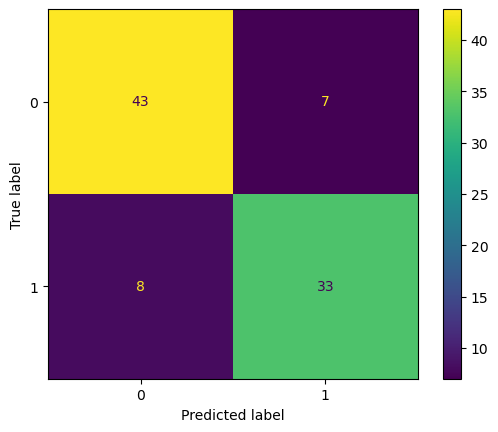

In [31]:
predictions = svm_lin.predict(X_test_transformed)
cm_re = confusion_matrix(y_test, predictions)
disp_re = ConfusionMatrixDisplay(confusion_matrix=cm_re)
disp_re.plot()
plt.show()

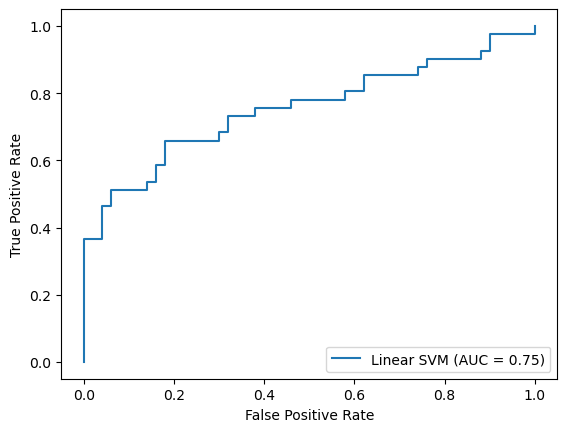

In [32]:
scores = [max(svm_lin.predict_proba(X_test_transformed)[i]) for i in range(len(svm_lin.predict_proba(X_test_transformed)))]
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Linear SVM')
display.plot()
plt.show()

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

The change in ROC demonstrates how different kernels in SVM influence the classification boundaries in a binary, two-dimensional classification problem given different thresholds. In my previously trained SVM model, the radial basic function (`rbf`) kernel is used as default. Visually, the ROC of the `linear` SVM signifies a better performing classifier. Generally speaking, this indicates that the data is more linearly seperable. The decision boundaries of rbf kernels tend to contract around data points that are close together. It is more suggestive that having heart disease vs not having heart disease is linearly seperable based off our host of medical predictors. This means that our SVM classifier with the rbf kernel appears to be too complex, leading to decicision boundaries that overfit the data.

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

Training a SVM on a linear kernel seperates the classes in their training data by maximizing the margin between the outermost data points of each class. Essentially, the goal is to have linear decision boundaries with large margins in attempt to seperate positive and negative hyperplanes (signifying the given dimensional space for each respecitive class) with adjustable bias-variance proprotion. On the other hand, the decision boundary of a logistic regression model is simply determined by the linear function of predictors (by maximizing the log likelihood) and the threshold that is used to classify data points.

# Printing Jupyter notebook to PDF

https://piazza.com/class/lr48piooit63hi/post/47 by Steven Bash

It may take a few minutes to run

In [ ]:
def colab2pdf():
  ENABLE=True # @param {type:"boolean"}
  if ENABLE:
    !apt-get install librsvg2-bin
    import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
    NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
    TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
    NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
    warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
    with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
  if not pathlib.Path("/usr/local/bin/quarto").exists():
    !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
    with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
    !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
    google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()